## Augmentation example
The augmentation is performed on the whole photo to make the best of the augmentation. 

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
datagen = ImageDataGenerator(
    rotation_range=20,     # For higher values, the detect_faces function doesn't seem to find any faces
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.25,
    brightness_range=[0.4,1.5],
    horizontal_flip=True,
    channel_shift_range=40,
    fill_mode='nearest')    # Alternatives: 'reflect', 'wrap'

In [3]:
path_to_img = 'augmentation_example.jpg'
img = cv2.imread(path_to_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

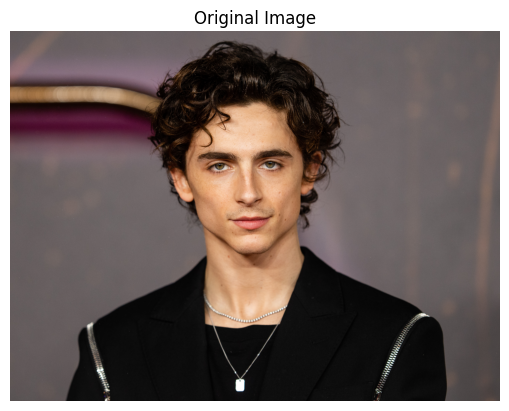

In [4]:
# Display original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

Number of augmented images is dependent on our dataset needs

In [5]:
# Generate augmented images and display
batch_size = 16      # Number of created augmentated images
augmented_images = []

# Use the flow method to generate augmented images
generator = datagen.flow(np.array([img]), batch_size=batch_size)

# Generate augmented images
for i in range(batch_size):
    augmented_image = generator.next()[0]
    augmented_images.append(augmented_image)


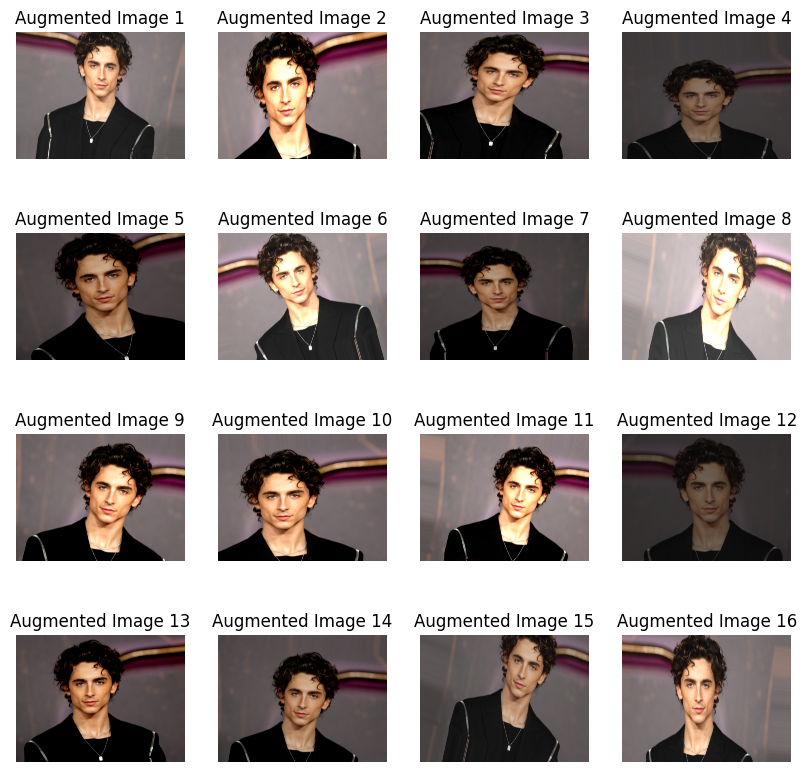

In [6]:
# Display augmented images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i in range(batch_size):
    axes[i//4,i%4].imshow(augmented_images[i]/255)
    axes[i//4,i%4].axis('off')
    axes[i//4,i%4].set_title(f'Augmented Image {i+1}')

plt.show()

In [7]:
# Importing detect_faces function to test it on augmented images
def detect_faces(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml" # pretrained model
    )
    faces = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return {
        'result': cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
        'faces': faces
    }

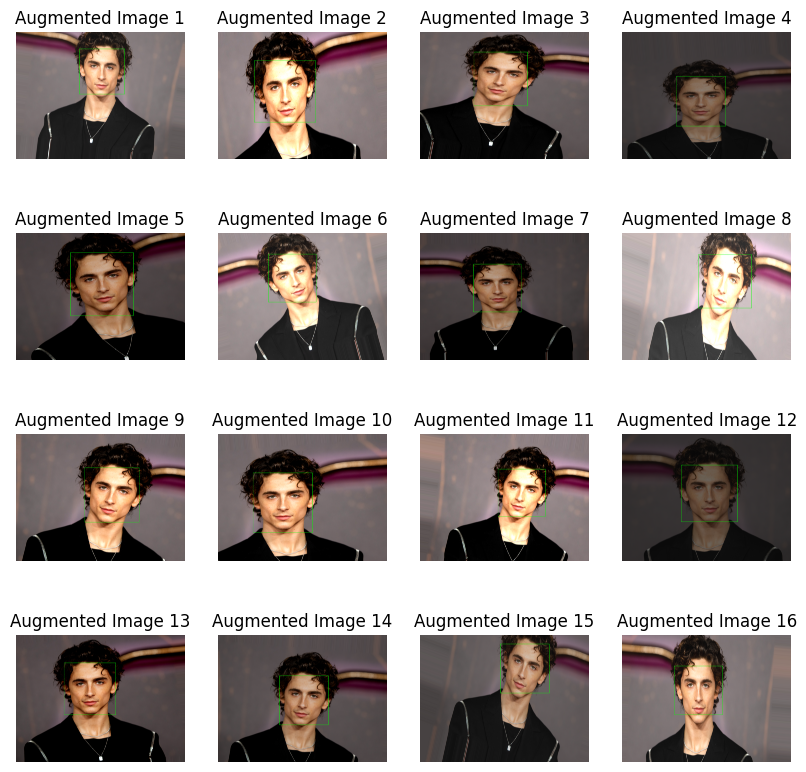

In [8]:
# Display augmented images with bounding_box
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i in range(batch_size):
    output = detect_faces(cv2.cvtColor(augmented_images[i], cv2.COLOR_RGB2BGR).astype(np.uint8))
    axes[i//4,i%4].imshow(output['result'])
    axes[i//4,i%4].axis('off')
    axes[i//4,i%4].set_title(f'Augmented Image {i+1}')

plt.show()